<a href="https://colab.research.google.com/github/jtao22/PythonAI/blob/main/CustomerChurn/customerchurnv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
#import 
import numpy as np
import pandas as pd 
from google.colab import files 
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.preprocessing import StandardScaler as SS
from sklearn.model_selection import train_test_split as tts
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib import cm
from keras.models import Sequential as seq
from keras.layers import Dense
from sklearn.metrics import accuracy_score as acc

In [ ]:
files.upload()

In [23]:
data = pd.read_csv('cc.csv')
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
data = data.drop(columns=['customerID'], axis=1)
le = LE()
ss = SS()
for col in data:
  if (data[col].dtypes):
    data[col] = le.fit_transform(data[col])

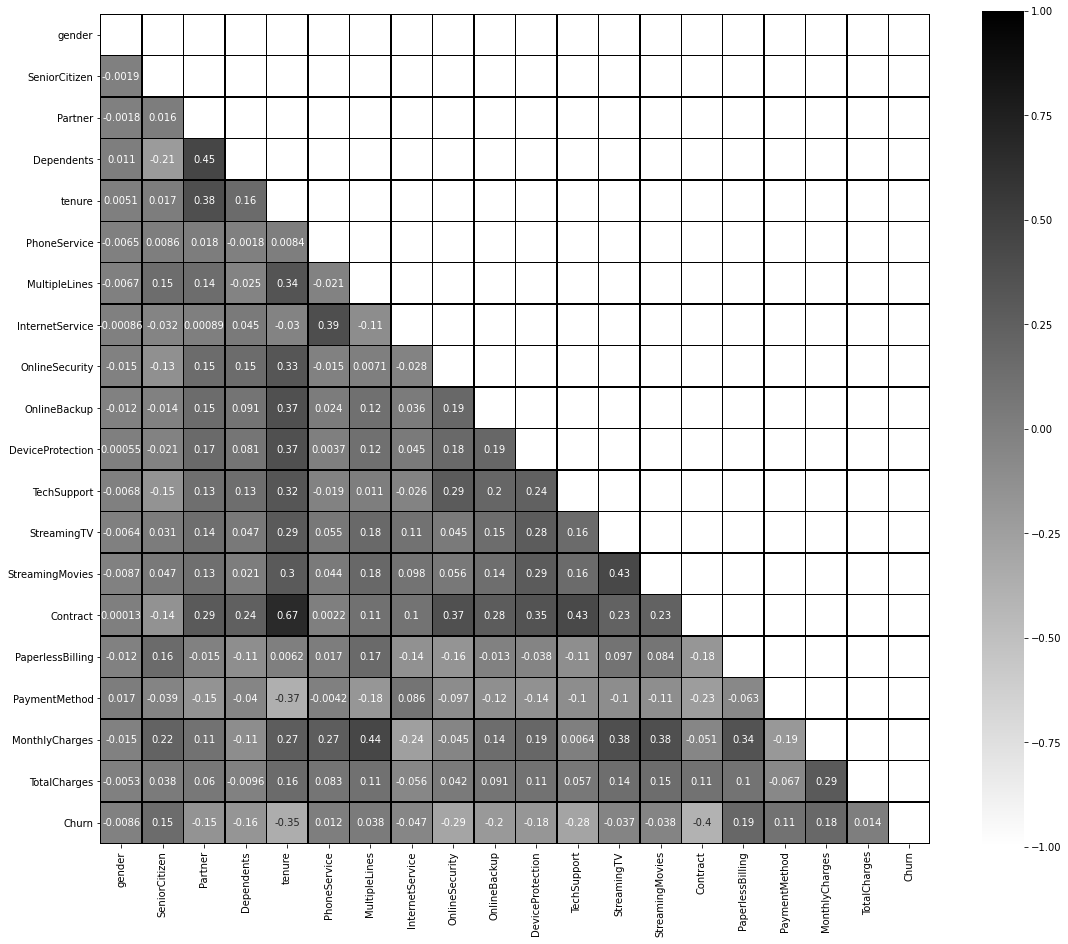

In [25]:
corr = data.corr(method='pearson')
fig = plt.figure(figsize=(16,16))
plot = fig.add_subplot(1,1,1)
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, annot = True, 
            vmin=-1, vmax=1, center= 0, 
            cmap= cm.binary,
            linewidths=0.5, linecolor='black',
            square=True, mask = mask, 
            cbar_kws={"shrink": .75})
plt.tight_layout()

In [26]:
data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1


In [27]:
Y = data['Churn']
data = data.drop(columns=['Churn'],axis=1)
data = ss.fit_transform(data)

In [28]:
trainX, testX, trainY, testY = tts(data, Y, test_size=0.2, random_state=15)

In [36]:
trainX.shape

(5634, 19)

In [47]:
#create model
arch = seq()
arch.add(Dense(units = 20, input_shape= (19,), activation = 'relu')) 
arch.add(Dense(units = 32, activation = 'relu')) 
arch.add(Dense(units = 64, activation = 'relu')) 
arch.add(Dense(units = 32, activation = 'relu')) 
arch.add(Dense(units = 1, activation = 'sigmoid'))
arch.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [48]:
arch.fit(trainX,trainY,batch_size=16,epochs=16)

Epoch 1/16
353/353 [==============================] - 1s 2ms/step - loss: 0.5081 - accuracy: 0.7326
Epoch 2/16
353/353 [==============================] - 1s 2ms/step - loss: 0.4300 - accuracy: 0.7896
Epoch 3/16
353/353 [==============================] - 1s 2ms/step - loss: 0.4222 - accuracy: 0.7959
Epoch 4/16
353/353 [==============================] - 1s 2ms/step - loss: 0.4131 - accuracy: 0.8015
Epoch 5/16
353/353 [==============================] - 1s 2ms/step - loss: 0.4079 - accuracy: 0.8056
Epoch 6/16
353/353 [==============================] - 1s 2ms/step - loss: 0.4036 - accuracy: 0.8058
Epoch 7/16
353/353 [==============================] - 1s 2ms/step - loss: 0.4115 - accuracy: 0.8032
Epoch 8/16
353/353 [==============================] - 1s 2ms/step - loss: 0.3946 - accuracy: 0.8116
Epoch 9/16
353/353 [==============================] - 1s 2ms/step - loss: 0.3803 - accuracy: 0.8199
Epoch 10/16
353/353 [==============================] - 1s 2ms/step - loss: 0.4024 - accuracy: 0.8008

In [56]:
predictions = arch.predict(testX).argmax(axis=1)
print(acc(predictions,testY)*100,'%')

72.60468417317246 %
